In [1]:
# Configure Notebook width
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import os
import numpy as np
from Lab_Analyses.Spine_Analysis_v2 import spine_utilities as s_utils
from Lab_Analyses.Spine_Analysis_v2.preprocess_spine_data import organize_dual_spine_data
from Lab_Analyses.Spine_Analysis_v2.spine_activity_analysis import spine_activity_analysis
from Lab_Analyses.Spine_Analysis_v2.local_coactivity_analysis import local_coactivity_analysis
from Lab_Analyses.Spine_Analysis_v2.dendritic_coactivity_analysis import dendritic_coactivity_analysis
from Lab_Analyses.Spine_Analysis_v2.spine_volume_normalization import batch_spine_volume_normalization
from Lab_Analyses.Spine_Analysis_v2.spine_activity_dataclass import Grouped_Spine_Activity_Data
from Lab_Analyses.Spine_Analysis_v2.local_coactivity_dataclass import Grouped_Local_Coactivity_Data
from Lab_Analyses.Spine_Analysis_v2.dendritic_coactivity_dataclass import Grouped_Dendritic_Coactivity_Data
## plotting modules
from Lab_Analyses.Spine_Analysis_v2 import spine_activity_plotting as spine_plotting
from Lab_Analyses.Spine_Analysis_v2 import dendrite_activity_plotting as dend_plotting
from Lab_Analyses.Spine_Analysis_v2 import local_coactivity_plotting as local_plotting
from Lab_Analyses.Spine_Analysis_v2 import dendritic_coactivity_plotting as global_plotting

In [2]:
# Set up file and path information
## Select session to analyze
load_session = "Early"
## Set path the save figures in
figure_path = r"C:\Users\Jake\Desktop\Figures\grouped_data\Dual_Spine_Imaging\Coactivity_Plasticity"
save_path = os.path.join(figure_path, load_session)
## Ensure the path exists
if not os.path.isdir(save_path):
    os.makedirs(save_path)

In [3]:
# General properties
exclude = "Shaft Spine"
threshold = (0.3,0.5)
mean_type = "median"
err_type = "CI"
test_type = "nonparametric"
test_method = "holm-sidak"
display_stats = True
vol_norm = False

In [4]:
# Apical vs Basal activity
# Load specified datasets
## Early
apical_activity_data = s_utils.load_analyzed_datasets(
    type="Activity",
    grouped=True,
    session="Early",
    norm=True,
    activity_type="dFoF",
    extended=None,
    mouse=None,
    fov=None,
    fov_type="apical",
    period=None,
    partner=None,
)

basal_activity_data = s_utils.load_analyzed_datasets(
    type="Activity",
    grouped=True,
    session="Early",
    norm=True,
    activity_type="dFoF",
    extended=None,
    mouse=None,
    fov=None,
    fov_type="basal",
    period=None,
    partner=None,
)

In [5]:
COLORS = ["goldenrod", "mediumseagreen"]

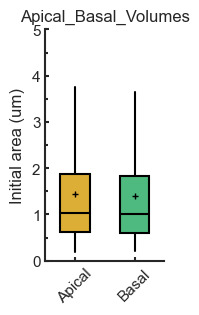

In [28]:
from Lab_Analyses.Plotting.plot_box_plot import plot_box_plot
from Lab_Analyses.Utilities import data_utilities as d_utils

apical_idxs = s_utils.find_present_spines(apical_activity_data.spine_flags)
basal_idxs = s_utils.find_present_spines(basal_activity_data.spine_flags)

# Initial volumes

apical_volumes = d_utils.subselect_data_by_idxs(apical_activity_data.spine_volumes, apical_idxs)
basal_volumes = d_utils.subselect_data_by_idxs(basal_activity_data.spine_volumes, basal_idxs)

plot_box_plot(
    data_dict={"Apical": apical_volumes, "Basal": basal_volumes},
    figsize=(2,3),
    title="Apical_Basal_Volumes",
    xtitle=None,
    ytitle="Initial area (um)",
    ylim=(0, 5),
    b_colors=COLORS,
    b_edgecolors="black",
    b_err_colors="black",
    m_color="black",
    m_width=1.5,
    b_width=0.5,
    b_linewidth=1.5,
    b_alpha=0.9,
    b_err_alpha=1,
    whisker_lim=None,
    whisk_width=1.5,
    outliers=False,
    showmeans=True,
    axis_width=1.5,
    minor_ticks="y",
    tick_len=3,
    ax=None,
    save=True,
    save_path=figure_path
    
)

In [7]:
from scipy import stats
t, p = stats.mannwhitneyu(
    apical_volumes[~np.isnan(apical_volumes)],
    basal_volumes[~np.isnan(basal_volumes)]
)
print(f"t = {t}  p = {p}")

t = 50669.0  p = 0.6481087433977915


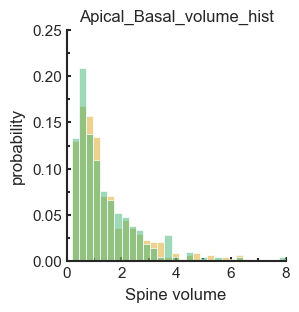

In [38]:
from Lab_Analyses.Plotting.plot_histogram import plot_histogram
plot_histogram(
    data=[apical_volumes, basal_volumes],
    bins=30,
    stat="probability",
    avlines=None,
    title="Apical_Basal_volume_hist",
    xtitle="Spine volume",
    xlim=(0, 8),
    figsize=(3,3),
    color=COLORS,
    alpha=0.5,
    axis_width=1.5,
    minor_ticks="both",
    tick_len=3,
    ax=None,
    save=True,
    save_path=figure_path,
)

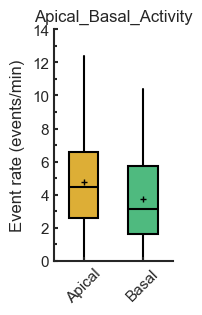

In [30]:
# Activity rates
apical_activity_rate = apical_activity_data.spine_activity_rate
basal_activity_rate = basal_activity_data.spine_activity_rate
apical_activity_rate = d_utils.subselect_data_by_idxs(apical_activity_rate, apical_idxs)
basal_activity_rate = d_utils.subselect_data_by_idxs(basal_activity_rate, basal_idxs)
plot_box_plot(
    data_dict={"Apical": apical_activity_rate, "Basal": basal_activity_rate},
    figsize=(2,3),
    title="Apical_Basal_Activity",
    xtitle=None,
    ytitle="Event rate (events/min)",
    ylim=(0, None),
    b_colors=COLORS,
    b_edgecolors="black",
    b_err_colors="black",
    m_color="black",
    m_width=1.5,
    b_width=0.5,
    b_linewidth=1.5,
    b_alpha=0.9,
    b_err_alpha=1,
    whisker_lim=None,
    whisk_width=1.5,
    outliers=False,
    showmeans=True,
    axis_width=1.5,
    minor_ticks="y",
    tick_len=3,
    ax=None,
    save=True,
    save_path=figure_path
)

In [9]:
t, p = stats.mannwhitneyu(
    apical_activity_rate[~np.isnan(apical_activity_rate)],
    basal_activity_rate[~np.isnan(basal_activity_rate)]
)
print(f"t = {t}  p = {p}")

t = 59973.0  p = 1.2119585377386489e-05


In [48]:
print(len(apical_activity_rate[~np.isnan(apical_activity_rate)]))
print(len(basal_activity_rate[~np.isnan(basal_activity_rate)]))

470
211


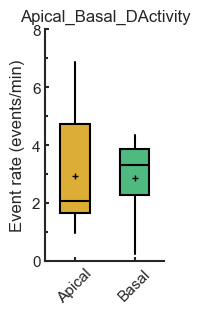

In [26]:
# Activity rates
apical_dactivity_rate = apical_activity_data.dendrite_activity_rate
basal_dactivity_rate = basal_activity_data.dendrite_activity_rate
apical_dactivity_rate = d_utils.subselect_data_by_idxs(apical_dactivity_rate, apical_idxs)
basal_dactivity_rate = d_utils.subselect_data_by_idxs(basal_dactivity_rate, basal_idxs)
plot_box_plot(
    data_dict={"Apical": apical_dactivity_rate, "Basal": basal_dactivity_rate},
    figsize=(2,3),
    title="Apical_Basal_DActivity",
    xtitle=None,
    ytitle="Event rate (events/min)",
    ylim=(0, None),
    b_colors=COLORS,
    b_edgecolors="black",
    b_err_colors="black",
    m_color="black",
    m_width=1.5,
    b_width=0.5,
    b_linewidth=1.5,
    b_alpha=0.9,
    b_err_alpha=1,
    whisker_lim=None,
    whisk_width=1.5,
    outliers=False,
    showmeans=True,
    axis_width=1.5,
    minor_ticks="y",
    tick_len=3,
    ax=None,
    save=False,
    save_path=figure_path
)

In [27]:
t, p = stats.mannwhitneyu(
    apical_dactivity_rate[~np.isnan(apical_dactivity_rate)],
    basal_dactivity_rate[~np.isnan(basal_dactivity_rate)]
)
print(f"t = {t}  p = {p}")

t = 44859.0  p = 0.04630159690693858


In [10]:
apical_ms = d_utils.subselect_data_by_idxs(apical_activity_data.movement_spines, apical_idxs)
basal_ms = d_utils.subselect_data_by_idxs(basal_activity_data.movement_spines, basal_idxs)

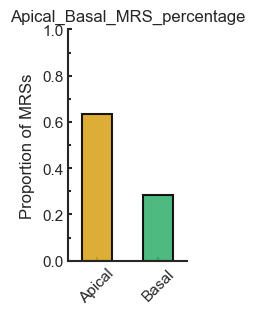

In [31]:
from Lab_Analyses.Plotting.plot_swarm_bar_plot import plot_swarm_bar_plot

plot_swarm_bar_plot(
    data_dict = {"Apical": [np.sum(apical_ms)/len(apical_ms)], "Basal": [np.sum(basal_ms)/len(basal_ms)]},
    figsize=(2,3),
    err_type="std",
    title="Apical_Basal_MRS_percentage",
    ytitle="Proportion of MRSs",
    ylim=(0,1),
    b_colors=COLORS,
    b_linewidth=1.5,
    b_alpha=0.9,
    s_colors=COLORS,
    plot_ind=False,
    axis_width=1.5,
    minor_ticks="y",
    tick_len=3,
    ax=None,
    save=True,
    save_path=figure_path,
)

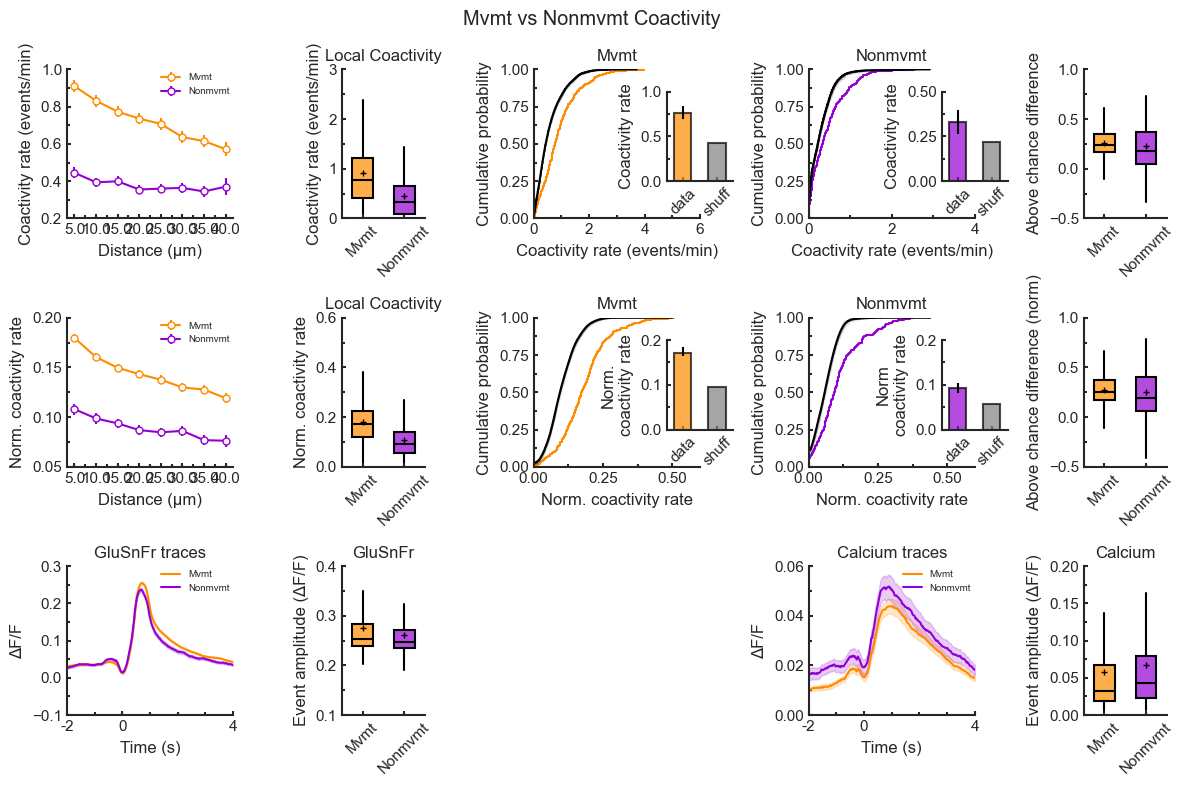

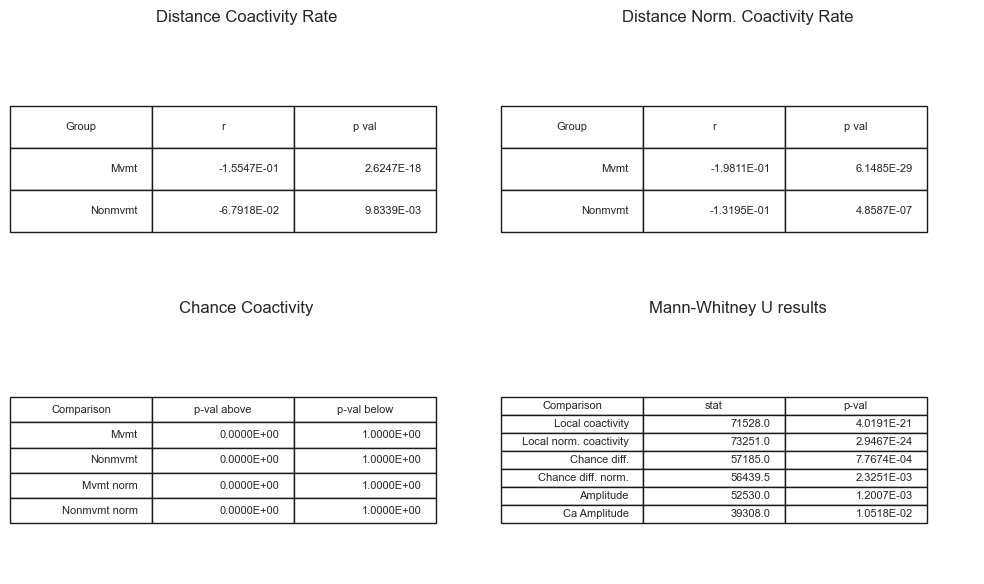

In [32]:
# Apical vs Basal activity
# Load specified datasets
## Early
apical_coactivity_data = s_utils.load_analyzed_datasets(
    type="Local",
    grouped=True,
    session="Early",
    norm=True,
    activity_type="dFoF",
    extended=None,
    mouse=None,
    fov=None,
    fov_type="apical",
    period=None,
    partner=None,
)

basal_coactivity_data = s_utils.load_analyzed_datasets(
    type="Local",
    grouped=True,
    session="Early",
    norm=True,
    activity_type="dFoF",
    extended=None,
    mouse=None,
    fov=None,
    fov_type="basal",
    period=None,
    partner=None,
)

local_plotting.plot_comparative_mvmt_coactivity(
    mvmt_dataset=apical_coactivity_data,
    nonmvmt_dataset=basal_coactivity_data,
    rwd_mvmts=False,
    figsize=(12,8),
    showmeans=True,
    mean_type="median",
    err_type="CI",
    test_type="nonparametric",
    display_stats=True,
    save=True,
    save_path=figure_path,
)

In [13]:
apical_global_data = s_utils.load_analyzed_datasets(
    type="Global",
    grouped=True,
    session="Early",
    norm=True,
    activity_type="dFoF",
    extended=None,
    mouse=None,
    fov=None,
    fov_type="apical",
    period=None,
    partner=None,
)

basal_global_data = s_utils.load_analyzed_datasets(
    type="Global",
    grouped=True,
    session="Early",
    norm=True,
    activity_type="dFoF",
    extended=None,
    mouse=None,
    fov=None,
    fov_type="basal",
    period=None,
    partner=None,
)

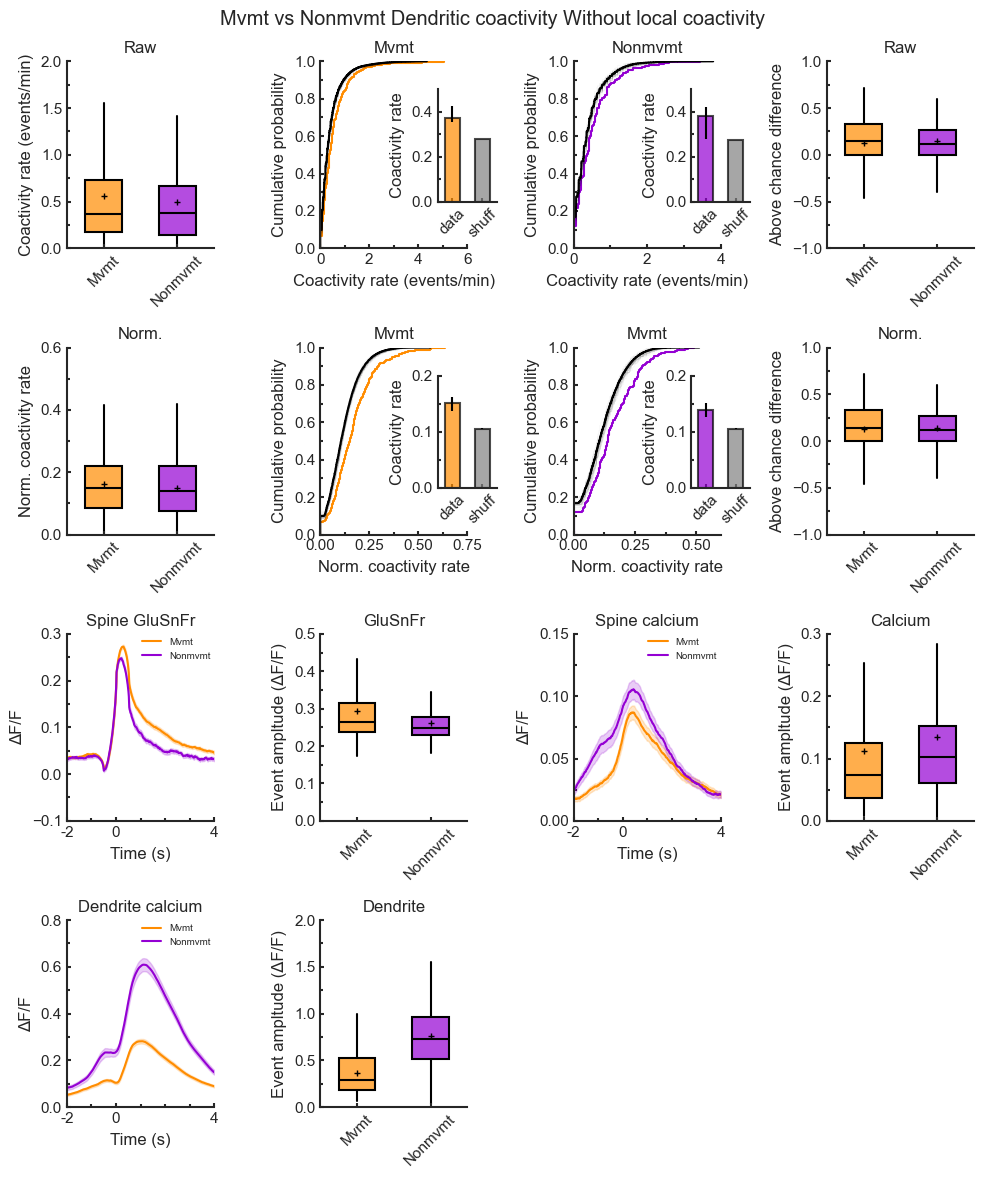

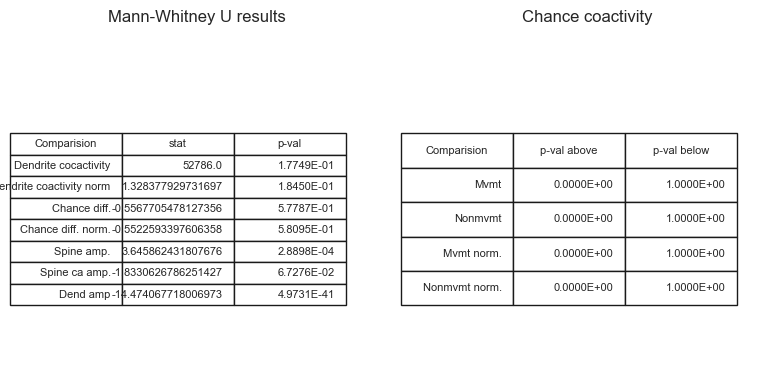

In [45]:
global_plotting.plot_comparative_mvmt_coactivity(
    mvmt_dataset=apical_global_data,
    nonmvmt_dataset=basal_global_data,
    coactivity_type="nonconj",
    figsize=(10,12),
    showmeans=True,
    mean_type="median",
    err_type="CI",
    test_type="nonparametric",
    display_stats=True,
    save=True,
    save_path=figure_path,
)

In [19]:
apical_s_frac = d_utils.subselect_data_by_idxs(apical_global_data.all_fraction_spine_coactive, apical_idxs)
basal_s_frac = d_utils.subselect_data_by_idxs(basal_global_data.all_fraction_spine_coactive, basal_idxs)

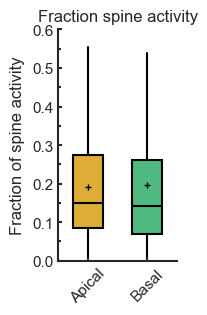

In [21]:
plot_box_plot(
    data_dict={"Apical": apical_s_frac, "Basal": basal_s_frac},
    figsize=(2,3),
    title="Fraction spine activity",
    xtitle=None,
    ytitle="Fraction of spine activity",
    ylim=(0, None),
    b_colors=COLORS,
    b_edgecolors="black",
    b_err_colors="black",
    m_color="black",
    m_width=1.5,
    b_width=0.5,
    b_linewidth=1.5,
    b_alpha=0.9,
    b_err_alpha=1,
    whisker_lim=None,
    whisk_width=1.5,
    outliers=False,
    showmeans=True,
    axis_width=1.5,
    minor_ticks="y",
    tick_len=3,
    ax=None,
    save=False,
    save_path=figure_path
)

In [22]:
t, p = stats.mannwhitneyu(
    apical_s_frac[~np.isnan(apical_s_frac)],
    basal_s_frac[~np.isnan(basal_s_frac)]
)
print(f"t = {t}  p = {p}")

t = 52610.0  p = 0.2026458158407114


In [23]:
apical_d_frac = d_utils.subselect_data_by_idxs(apical_global_data.all_fraction_dendrite_coactive, apical_idxs)
basal_d_frac = d_utils.subselect_data_by_idxs(basal_global_data.all_fraction_dendrite_coactive, basal_idxs)

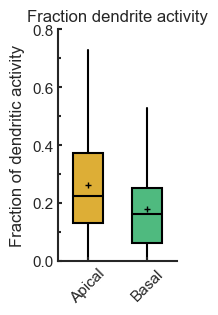

In [24]:
plot_box_plot(
    data_dict={"Apical": apical_d_frac, "Basal": basal_d_frac},
    figsize=(2,3),
    title="Fraction dendrite activity",
    xtitle=None,
    ytitle="Fraction of dendritic activity",
    ylim=(0, None),
    b_colors=COLORS,
    b_edgecolors="black",
    b_err_colors="black",
    m_color="black",
    m_width=1.5,
    b_width=0.5,
    b_linewidth=1.5,
    b_alpha=0.9,
    b_err_alpha=1,
    whisker_lim=None,
    whisk_width=1.5,
    outliers=False,
    showmeans=True,
    axis_width=1.5,
    minor_ticks="y",
    tick_len=3,
    ax=None,
    save=False,
    save_path=figure_path
)

In [25]:
t, p = stats.mannwhitneyu(
    apical_d_frac[~np.isnan(apical_d_frac)],
    basal_d_frac[~np.isnan(basal_d_frac)]
)
print(f"t = {t}  p = {p}")

t = 63842.5  p = 1.9036176807742478e-09


In [9]:
import numpy as np

a = np.array([[1,1,1,3,3,3,5,5,5],
              [2,2,2,4,4,4,6,6,6]])

b = 1 - a

b

array([[ 0,  0,  0, -2, -2, -2, -4, -4, -4],
       [-1, -1, -1, -3, -3, -3, -5, -5, -5]])

In [5]:
a = np.array([0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0])

pad = np.zeros(1)

b = np.diff(np.concatenate((pad, a, pad))) !=0
np.nonzero(b)[0]

array([ 6,  9, 14, 20], dtype=int64)

In [6]:
c = np.diff(np.concatenate((pad, a, pad)))
np.nonzero(c)[0]

array([ 6,  9, 14, 20], dtype=int64)

In [12]:
axis = 1
c = []
for i in range(a.shape[axis]):
    c.append(a.take(i, axis=axis))

In [16]:
np.stack(c, axis=axis)

array([[1, 1, 1, 3, 3, 3, 5, 5, 5],
       [2, 2, 2, 4, 4, 4, 6, 6, 6]])

In [17]:
c

[array([1, 2]),
 array([1, 2]),
 array([1, 2]),
 array([3, 4]),
 array([3, 4]),
 array([3, 4]),
 array([5, 6]),
 array([5, 6]),
 array([5, 6])]